# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [14]:
data = pd.read_csv('weight-height.csv')
male_df =  data.loc[data['Gender'] == 'Male']
female_df =  data.loc[data['Gender'] == 'Female']

print('Male Height mean:', male_df.Height.mean())
print('Male Height sd:', male_df.Height.std())      

print('Male Weight mean:', male_df.Weight.mean())
print('Male Weight sd:' ,male_df.Weight.std())   

print('Female Height mean:', female_df.Height.mean())
print('Female Height sd:' ,female_df.Height.std())      

print('Female Weight mean:', female_df.Weight.mean())
print('Female Weight sd:' ,female_df.Weight.std()) 

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621741
Male Height sd: 2.863362228660647
Male Weight mean: 187.0206206581932
Male Weight sd: 19.7811545167638
Female Height mean: 63.70877360342507
Female Height sd: 2.696284015765054
Female Weight mean: 135.86009300746835
Female Weight sd: 19.022467805319028


In [7]:
data = pd.read_csv('weight-height.csv')
male_df =  data.loc[data['Gender'] == 'Male']
female_df =  data.loc[data['Gender'] == 'Female']
female_df.Height.describe()

count    5000.000000
mean       63.708774
std         2.696284
min        54.263133
25%        61.894441
50%        63.730924
75%        65.563565
max        73.389586
Name: Height, dtype: float64

#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

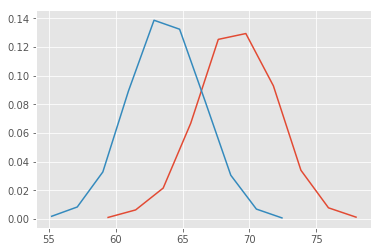

In [15]:
mhn, mhbins = np.histogram(male_df.Height, 10, density=1)
fhn, fhbins = np.histogram(female_df.Height, 10, density=1)

# Initialize numpy arrays according to number of bins with zeros to store interpolated values
pdfmhx = np.zeros(mhn.size)
pdfmhy = np.zeros(mhn.size)
pdffhx = np.zeros(fhn.size)
pdffhy = np.zeros(fhn.size)

# Interpolate through histogram bins 
# identify middle point between two neighbouring bins, in terms of x and y coords
for k in range(mhn.size):
    pdfmhx[k] = 0.5*(mhbins[k]+mhbins[k+1])
    pdfmhy[k] = mhn[k]
    
for k in range(fhn.size):    
    pdffhx[k] = 0.5*(fhbins[k]+fhbins[k+1])
    pdffhy[k] = fhn[k]

# plot the calculated curve
plt.plot(pdfmhx, pdfmhy)
plt.plot(pdffhx, pdffhy)

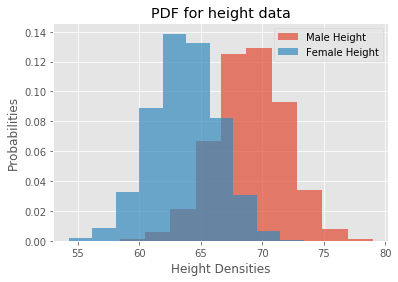

In [20]:
male_df.Height.plot.hist(bins = 10, density = True, label = 'Male Height', alpha = 0.7)
female_df.Height.plot.hist(bins = 10, density = True, label = 'Female Height', alpha = 0.7)
#plt.plot(male_df.Height, pdfmhx, pdfmhy, label = 'Height Density function')
#plt.plot(female_df.Height, pdfmhx, pdffhy, label = 'Height Density function')
plt.xlabel ('Height Densities')
plt.ylabel ('Probabilities')
plt.title ('PDF for height data')
plt.legend()
plt.show()

In [ ]:
# Record your observations - are these inline with your personal observations?



#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density function

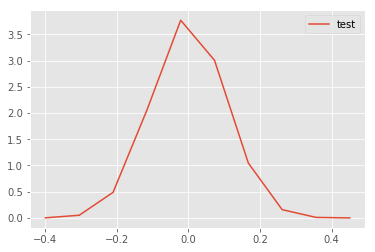

In [28]:
def density(x):
    
    n, bins = np.histogram(x, 10, density=1)

# Initialize numpy arrays with zeros to store interpolated values
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    # Interpolate through histogram bins 
    # identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]

    # plot the calculated curve
    return pdfx, pdfy

    
    



# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000000)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

In [25]:
s

array([ 0.04412275, -0.03308702,  0.24307712, -0.02520921,  0.01096098,
        0.15824811, -0.09092324, -0.05916367,  0.01876032, -0.032987  ,
       -0.11927646, -0.02048765, -0.03588289,  0.06034716, -0.16647885,
       -0.0700179 ,  0.1151391 ,  0.1857331 , -0.15111796,  0.06448475,
       -0.09806079, -0.08568532, -0.08718792, -0.04225079,  0.09964398,
        0.07124213,  0.00591442, -0.03633109,  0.00032888, -0.01059304,
        0.07930533, -0.06315716, -0.00061949, -0.01010676, -0.00523082,
        0.02492177,  0.01976601,  0.13348486, -0.00868756,  0.15615323,
       -0.0305853 , -0.04777314,  0.01007382,  0.03554385,  0.02696124,
        0.12919634,  0.1139343 ,  0.04944404, -0.03363363, -0.01006143,
        0.1413398 ,  0.02212541, -0.13107731, -0.06895652, -0.05775132,
        0.11522048, -0.0107164 ,  0.22601068,  0.06566195,  0.01248068,
       -0.04357039,  0.09721793, -0.02407111, -0.08241235,  0.05681327,
        0.00127583,  0.11890607, -0.00735933, -0.2859688 ,  0.07

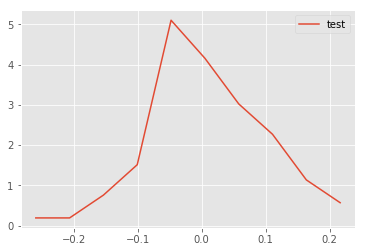

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

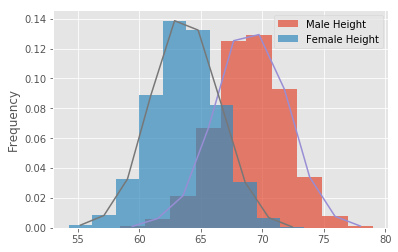

In [31]:
# You code here 
male_df.Height.plot.hist(bins = 10, density = True,  alpha = 0.7, label ="Male Height");
female_df.Height.plot.hist(bins = 10, density = True, alpha = 0.7, label = 'Female Height');
plt.legend()
x,y = density(male_df.Height)
plt.plot(x,y)
x,y = density(female_df.Height)
plt.plot(x,y)
plt.show()

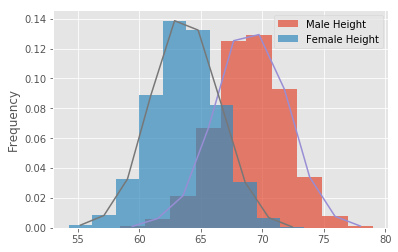

#### Repeat above exerice for male and female weights

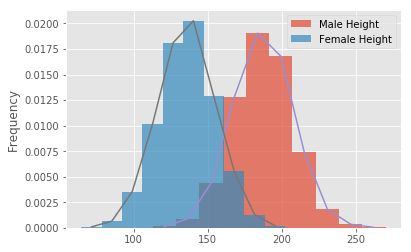

In [32]:
# Your code here 
male_df.Weight.plot.hist(bins = 10, density = True,  alpha = 0.7, label ="Male Height");
female_df.Weight.plot.hist(bins = 10, density = True, alpha = 0.7, label = 'Female Height');
plt.legend()
x,y = density(male_df.Weight)
plt.plot(x,y)
x,y = density(female_df.Weight)
plt.plot(x,y)
plt.show()

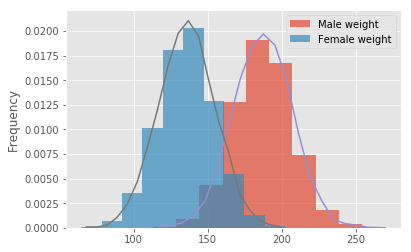

#### Write your observations in the cell below.

In [68]:
# Record your observations - are these inline with your personal observations?


# So whats the takeaway when comparing male and female heights and weights 



#### Repeat Above experiments in seaborn and compare with your results. 

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


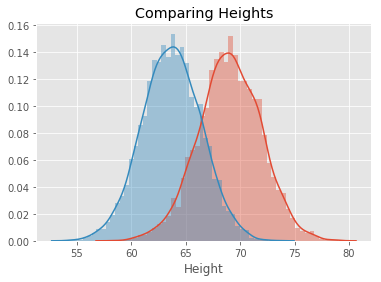

In [33]:
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title('Comparing Heights')
plt.show()

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


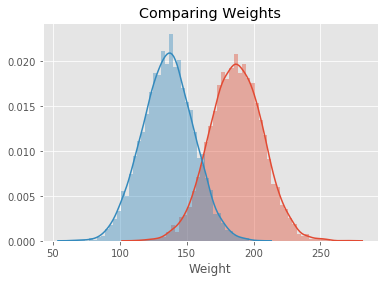

In [36]:
import seaborn as sns
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)
plt.title('Comparing Weights')
plt.show()

Text(0.5,1,'Comparing Weights')

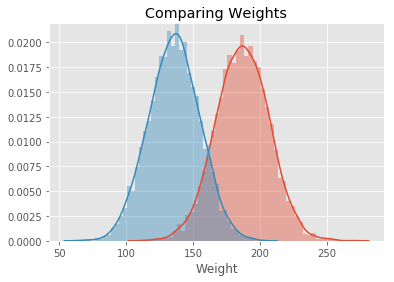

In [ ]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.